# **python 3: essentials** - part 5/11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

## **Advanced Matplotlib**

In [2]:
import matplotlib.pyplot as plt
# we can modify the parameters of a figure by using:
plt.rcParams['figure.figsize']=(7,5) # inches
plt.rcParams['font.size']=16 # points
plt.rcParams['font.family']='Liberation Serif'
# also, one might need to use the following code in order to stop
# the labels from falling off the figure
plt.rcParams['figure.autolayout']=True

### **bar plot**

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


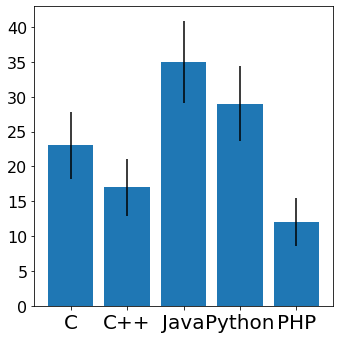

In [3]:
fig, ax=plt.subplots(figsize=(5,5))

# our data
labs = ["C","C++","Java","Python","PHP"]
students = [23,17,35,29,12]

# plot the bar
ax.bar(labs,students,yerr=np.sqrt(students))

# adjust axis features
ax.tick_params(labelsize=20,axis='x')

### **histograms**

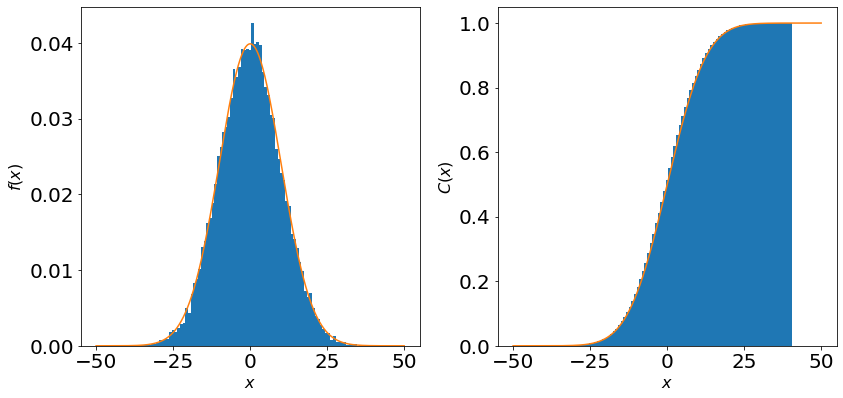

In [4]:
# sample from a gaussian function
mu, sigma = 0,10
x = np.random.normal(scale=sigma,size=20000)
x_range = np.linspace(-50,50,1000)

# change parameters of the matplotlib elements
# you can get info about different elements by printing all keys of the dictionary
# print(plt.rcParams.keys())
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20


# create the figure, 1 row and 2 columns with a size of 8x8
fig2, ax2=plt.subplots(1,2,figsize=(12,12))

# adjust spacing between plots
plt.subplots_adjust(wspace=0.4)

# gaussian
ax2[0].hist(x,bins=100,density=True)
ax2[0].plot(x_range,1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x_range-mu)**2/(2*sigma**2)))

# gaussian cumulative function (https://en.wikipedia.org/wiki/Normal_distribution)
ax2[1].hist(x,bins=100,cumulative=True,density=True)
ax2[1].plot(x_range,0.5*(1+special.erf((x_range-mu)/(sigma*np.sqrt(2)))))

# produce square plots, the figsize is also overwritten (see here https://www.delftstack.com/howto/matplotlib/how-to-make-a-square-plot-with-equal-axes-in-matplotlib/)
ax2[0].set_aspect(1./ax2[0].get_data_ratio())
ax2[1].set_aspect(1./ax2[1].get_data_ratio())

# set labels
ax2[0].set_ylabel(r"$f(x)$")
ax2[0].set_xlabel(r"$x$")

# set labels
ax2[1].set_ylabel(r"$C(x)$")
ax2[1].set_xlabel(r"$x$")

plt.show()

### **scatter plots**

Text(0.5, 0, '$b$')

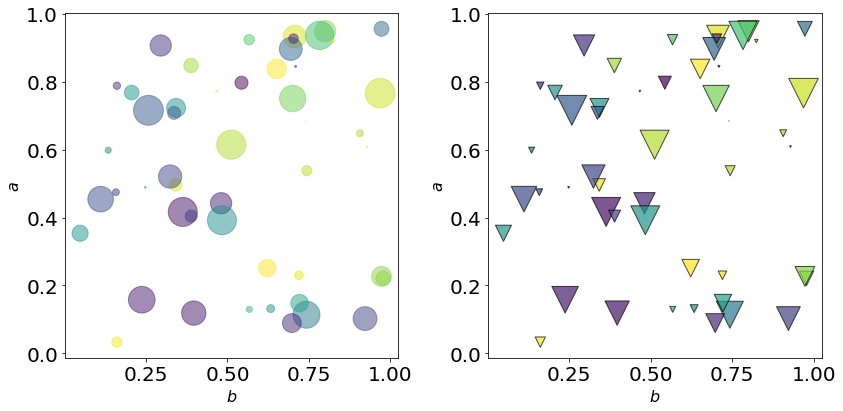

In [5]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# number of points
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

# set numbers to trace colors
colors = np.random.rand(N)

# set numbers to trace point size
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

# figure
fig3, ax3=plt.subplots(1,2,figsize=(12,6))
# the scatter plot: s->size, c->color
ax3[0].scatter(x, y, s=area, c=colors, alpha=0.5)

# different marker (see here https://matplotlib.org/3.5.0/api/markers_api.html#module-matplotlib.markers)
ax3[1].scatter(x, y, s=area, c=colors, alpha=0.7, marker='v',edgecolor='k')

# set labels
ax3[0].set_ylabel(r"$a$")
ax3[0].set_xlabel(r"$b$")

# set labels
ax3[1].set_ylabel(r"$a$")
ax3[1].set_xlabel(r"$b$")

### **Contour and density plots**

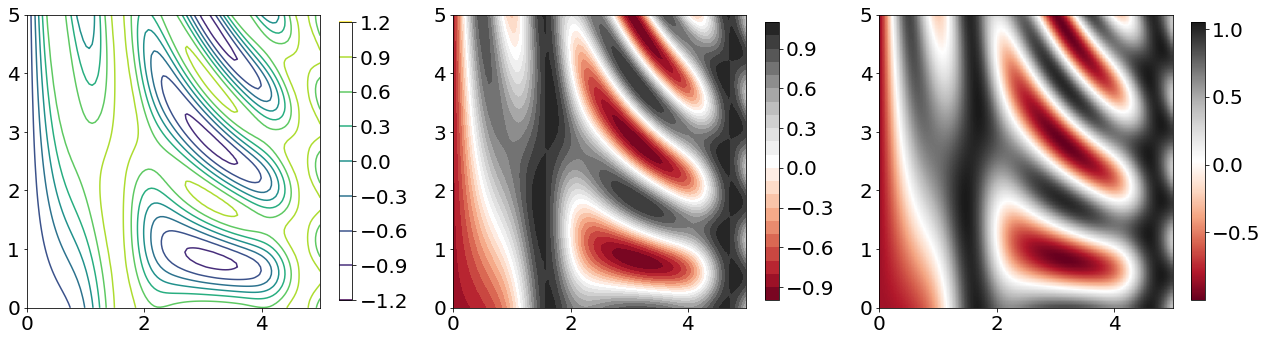

In [6]:
# function to be represented
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# x and y range
x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 80)

# combine x and x into 2D arrays and evaluate the function on that grid
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# figure with three columns
fig4, ax4 = plt.subplots(1,3,figsize=(18,6))

a = ax4[0].contour(X, Y, Z)

b = ax4[1].contourf(X, Y, Z, levels=20, cmap='RdGy')

c = ax4[2].imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')

# countour and contourf do no set the aspect of the plot, so for squared plots you need to set it up
ax4[0].set_aspect(1./ax4[0].get_data_ratio())
ax4[1].set_aspect(1./ax4[1].get_data_ratio())

# color bars
cb0 = plt.colorbar(a, ax=ax4[0], shrink=0.7)
cb1 = plt.colorbar(b, ax=ax4[1], shrink=0.7)
cb2 = plt.colorbar(c, ax=ax4[2], shrink=0.7)

### **Combining contour and imshow**

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


Text(0, 0.5, '$y$')

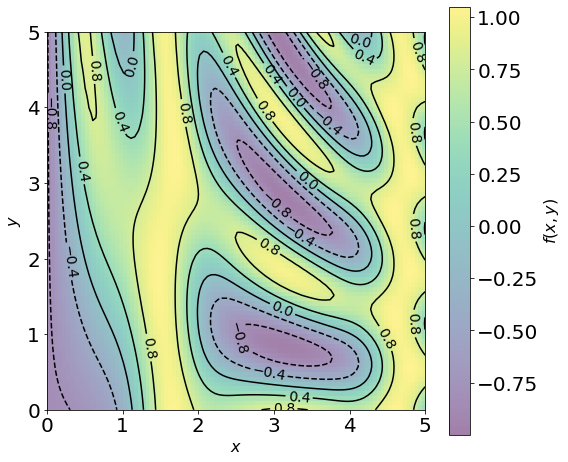

In [7]:
fig5, ax5=plt.subplots(figsize=(8,8))

cp = ax5.contour(X, Y, Z, levels=5, colors='black')
# set contour labels
plt.clabel(cp, inline=True, fontsize=14)

cp_im = ax5.imshow(Z, extent=[0, 5, 0, 5], origin='lower', alpha=0.5)
cb = plt.colorbar(cp_im, ax=ax5,shrink=0.8)
cb.set_label(r"$f(x,y)$")

ax5.set_xlabel(r"$x$")
ax5.set_ylabel(r"$y$")

### **2D histograms**

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


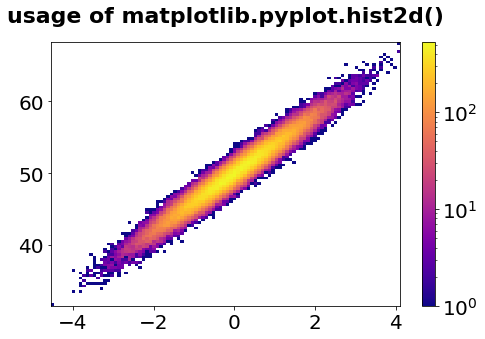

In [8]:
import matplotlib.colors as colors # to deal with normalisation we import matplotlib colors

# data
N_points = 100000
x = np.random.randn(N_points)
y = 4 * x + np.random.randn(100000) + 50

fig6, ax6=plt.subplots()

# here two 1D array are needed; color trace the number of entries per bin and is normalised as a log scale between min and max
h = ax6.hist2d(x, y, bins = 100, norm = colors.LogNorm(), cmap ="plasma")

# set a title
ax6.set_title('usage of matplotlib.pyplot.hist2d()', fontweight ="bold", fontsize=22, pad=20)

# note that differently from contour and imshow hist2d returns 4 objects, the image usable by colorbar is the last one
cbh = plt.colorbar(h[-1])

### **3D plots**

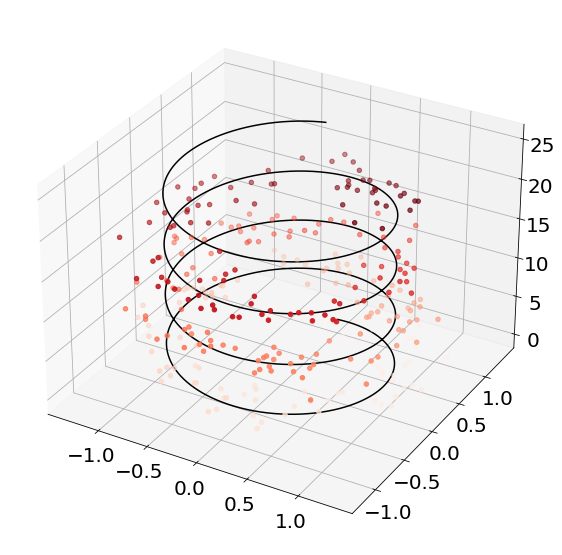

In [9]:
from mpl_toolkits import mplot3d

fig3d = plt.figure(figsize=(8,8))
ax3d = plt.axes(projection='3d')

# Data for a three-dimensional line, i.e. trigonometric spiral
zline = np.linspace(0, 25, 3000)
xline = np.sin(zline)
yline = np.cos(zline)
ax3d.plot(xline, yline, zline, color='k')

# Data for three-dimensional scattered points
zdata = 20 * np.random.random(300)
xdata = np.sin(zdata) + 0.2 * np.random.randn(300)
ydata = np.cos(zdata) + 0.2 * np.random.randn(300)
ax3d.scatter(xdata, ydata, zdata, c=np.sqrt(xdata**2+ydata**2+zdata**2), cmap='Reds') # note that here we have 4D info!

ax3d.set_aspect('auto')
#ax3d.view_init(30, 35)

### **animations**

In [10]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

# creating a blank window for the animation
fig = plt.figure(figsize=(8,8))
axis = plt.axes(xlim =(-50, 50), ylim =(-50, 50))
axis.set_aspect(1)

# we create a line2D object that will be modified by each frame call
line, = axis.plot([], [], lw = 2)

# Initialization function: plot the background of each frame
def init():
	line.set_data([], [])
	return line,

# Animation function which updates figure data. This is called sequentially
def animate(i):
	# t is a parameter which varies with the frame number
	t = 0.1 * i
	
	# x, y values to be plotted at time t
	x = t * np.sin(t)
	y = t * np.cos(t)
	
	# appending values to the previously empty x and y data holders
	xdata.append(x)
	ydata.append(y)
	line.set_data(xdata, ydata)
	
	return line,

# initializing empty values for x and y co-ordinates
xdata, ydata = [], []

# Call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func = init, frames = 500, interval = 20, blit = True)

# saves the animation in our desktop
#anim.save('growingCoil.mp4', writer = 'ffmpeg', fps = 30)

# embed as HTLM
plt.close(anim._fig)
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available